In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [38]:
antiviral=pd.read_csv("Antiviral/antiviral_nomod_canon.csv")
hlp=pd.read_csv("HLP/HLP.csv")
peplife=pd.read_csv("PEPLIFE/PEP_LIFE_nomod_canon.csv")
peptherdia=pd.read_csv("PepTherDia/PepTherDia_nomod_canon.csv")
plifepred=pd.read_csv("Plifepred/plifepred_nomod_canon.csv")
serum=pd.read_csv("Serum/serum_nomod_canon.csv")

In [39]:
dataframes = {
    "Antiviral": antiviral,
    "HLP": hlp,
    "PepLife": peplife,
    "PepTherDia": peptherdia,
    "PlifePred": plifepred,
    "Serum": serum
}

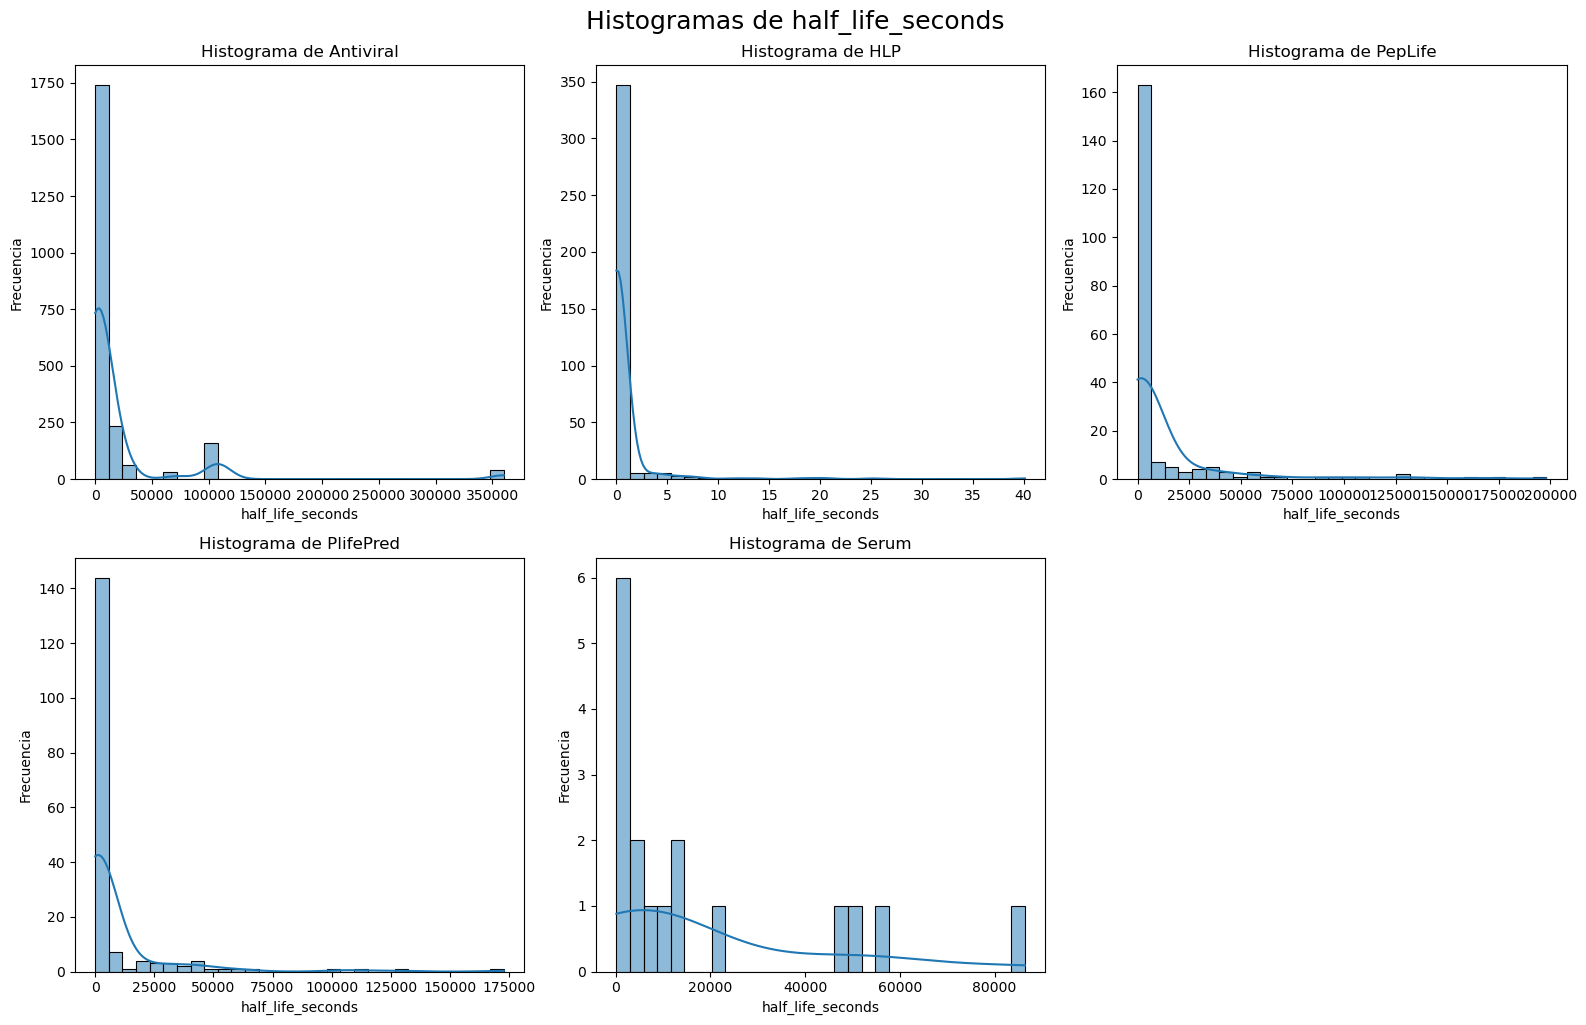

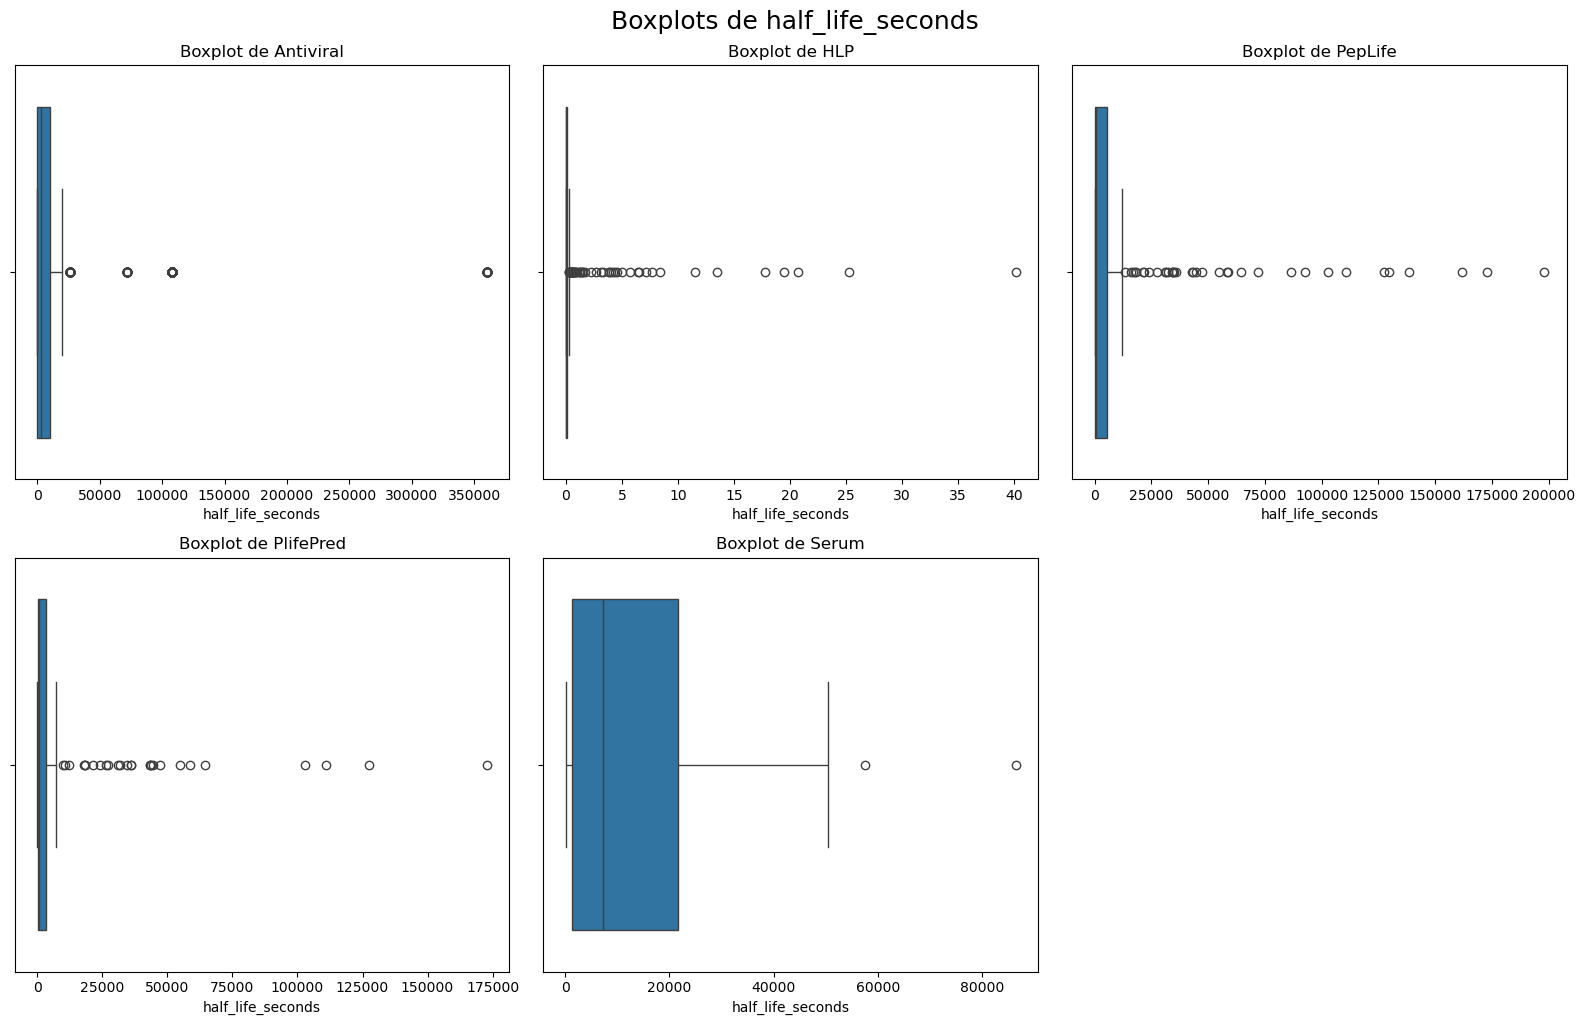

In [40]:
# Extraer la columna `half_life_seconds` solo si existe y no está vacía
columns_to_plot = {
    name: df["half_life_seconds"] 
    for name, df in dataframes.items() 
    if "half_life_seconds" in df.columns and not df["half_life_seconds"].dropna().empty
}

# Configuración de subplots: 2 filas arriba, 3 abajo (en total 2x3 = 6 espacios)
n_cols = 3
n_rows = 2

# Crear figura para los histogramas
plt.figure(figsize=(16, 10))
for i, (name, column) in enumerate(columns_to_plot.items(), 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(column, kde=True, bins=30)
    plt.title(f"Histograma de {name}")
    plt.xlabel("half_life_seconds")
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.suptitle("Histogramas de half_life_seconds", fontsize=18, y=1.02)
plt.show()

# Crear figura para los boxplots
plt.figure(figsize=(16, 10))
for i, (name, column) in enumerate(columns_to_plot.items(), 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=column)
    plt.title(f"Boxplot de {name}")
    plt.xlabel("half_life_seconds")
plt.tight_layout()
plt.suptitle("Boxplots de half_life_seconds", fontsize=18, y=1.02)
plt.show()

Correlación original:
           Antiviral       HLP   PepLife  PlifePred     Serum
Antiviral   1.000000  0.221541 -0.022628   0.149973       NaN
HLP         0.221541  1.000000 -0.080121   0.006096 -0.153995
PepLife    -0.022628 -0.080121  1.000000  -0.064064 -0.264609
PlifePred   0.149973  0.006096 -0.064064   1.000000 -0.293496
Serum            NaN -0.153995 -0.264609  -0.293496  1.000000

Intervalos de confianza del bootstrap (95%):
Antiviral y HLP: Correlación original = 0.222, Intervalo de confianza 95%: (0.158, 0.290)
Antiviral y PepLife: Correlación original = -0.023, Intervalo de confianza 95%: (-0.147, 0.106)
Antiviral y PlifePred: Correlación original = 0.150, Intervalo de confianza 95%: (0.056, 0.222)
Antiviral y Serum: Correlación original = nan, Intervalo de confianza 95%: (nan, nan)
HLP y PepLife: Correlación original = -0.080, Intervalo de confianza 95%: (-0.111, -0.052)
HLP y PlifePred: Correlación original = 0.006, Intervalo de confianza 95%: (-0.085, 0.187)
HLP y Seru

ValueError: m has more than 2 dimensions

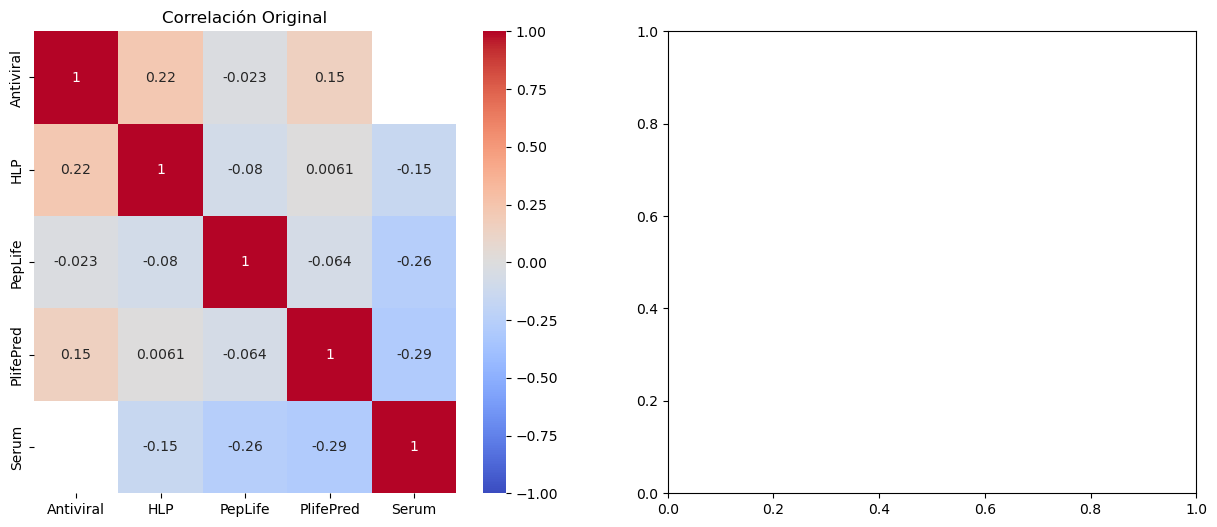

In [41]:
# Extraer solo las columnas `half_life_seconds` y unirlas
columns_to_analyze = {
    name: df["half_life_seconds"] 
    for name, df in dataframes.items() 
    if "half_life_seconds" in df.columns and not df["half_life_seconds"].dropna().empty
}

# Crear DataFrame con las columnas `half_life_seconds`
df_half_life = pd.DataFrame(columns_to_analyze)

# Calcular la correlación original entre las columnas
original_corr = df_half_life.corr()

# Función para calcular correlación con bootstrap
def bootstrap_corr(data, n_iterations=1000):
    correlations = []
    for _ in range(n_iterations):
        # Remuestreo con reemplazo
        sample = resample(data, replace=True)
        # Calcular la correlación en la muestra
        corr = sample.corr()
        correlations.append(corr)
    # Convertir la lista de correlaciones en un array para analizar estadísticas
    return np.array(correlations)

# Realizar bootstrap y calcular la distribución de la correlación
bootstrap_results = bootstrap_corr(df_half_life)

# Calcular intervalos de confianza (percentiles) de las correlaciones
lower_bound = np.percentile(bootstrap_results, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_results, 97.5, axis=0)

# Mostrar la correlación original y los intervalos de confianza del bootstrap
print("Correlación original:")
print(original_corr)

print("\nIntervalos de confianza del bootstrap (95%):")
for i, col1 in enumerate(df_half_life.columns):
    for j, col2 in enumerate(df_half_life.columns):
        if i < j:
            print(f"{col1} y {col2}: Correlación original = {original_corr.iloc[i, j]:.3f}, "
                  f"Intervalo de confianza 95%: ({lower_bound[i, j]:.3f}, {upper_bound[i, j]:.3f})")

# Visualizar la matriz de correlación original y bootstrap
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Visualizar la correlación original
sns.heatmap(original_corr, annot=True, cmap="coolwarm", ax=ax[0], vmin=-1, vmax=1)
ax[0].set_title("Correlación Original")

# Visualizar la matriz de correlación de los intervalos de confianza bootstrap
sns.heatmap(np.corrcoef(bootstrap_results.T), annot=True, cmap="coolwarm", ax=ax[1], vmin=-1, vmax=1)
ax[1].set_title("Correlación Bootstrap (promedio)")

plt.tight_layout()
plt.show()
